In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from scipy import interpolate

BF_vals = np.load("BFresults.npy")

In [34]:
darkSUSY_to_PPPC_converter = {
            "nuenue":"nu_e",
            "e+e-": "e",
            "numunumu":"nu_mu",
            "mu+mu-":"mu",
            'nutaunutau':"nu_tau",
            "tau+tau-":"tau",
            "cc": "c",
            "bb": "b",
            "tt": "t",
            "W+W-": "W",
            "ZZ": "Z",
            "gg": "g",
            "gammagamma": "gamma",
            "HH": "h",
        }


darkSUSY_BFs_cleaned = pd.read_csv('gammabayes/BFCalc/darkSUSY_BFs/darkSUSY_BFs_cleaned.csv', delimiter=' ')

darkSUSY_massvalues = darkSUSY_BFs_cleaned.iloc[:,1]/1e3

darkSUSY_lambdavalues = darkSUSY_BFs_cleaned.iloc[:,2]

channelfuncdictionary = {}


log10xvals = np.load("gammabayes/BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")
massvalues = np.load("gammabayes/BFCalc/griddata/massvals_massenergy_diffflux_grid.npy")

for darkSUSYchannel in list(darkSUSY_to_PPPC_converter.keys()):
    try:
        gammapychannel = darkSUSY_to_PPPC_converter[darkSUSYchannel]
        
        tempspectragrid = np.load("gammabayes/BFCalc/griddata/channel={gammapychannel}_massenergy_diffflux_grid.npy")
        
        channelfuncdictionary[darkSUSYchannel] = interpolate.RegularGridInterpolator((np.log10(massvalues/1e3), log10xvals), np.array(tempspectragrid), 
                                                                                method='linear', bounds_error=False, fill_value=1e-3000)
    except:
        channelfuncdictionary[darkSUSYchannel] = lambda logmass, log10x: log10x*0


darkSUSY_BFs_cleaned_vals = darkSUSY_BFs_cleaned.to_numpy()[:,3:]
darkSUSY_BFs_cleaned_vals = darkSUSY_BFs_cleaned_vals/np.sum(darkSUSY_BFs_cleaned_vals, axis=1)[:, np.newaxis]

partial_sigmav_interpolator_dictionary = {channel: interpolate.LinearNDInterpolator((darkSUSY_massvalues, darkSUSY_lambdavalues),darkSUSY_BFs_cleaned_vals[:,idx]) for idx, channel in enumerate(list(darkSUSY_to_PPPC_converter.keys()))}


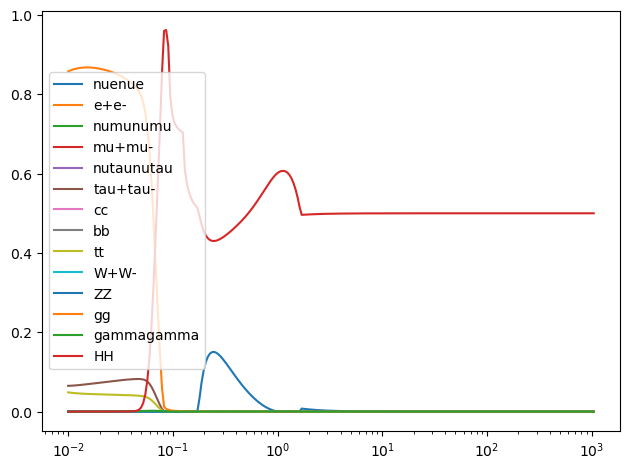

In [40]:


plt.figure()
for darkSUSY_channel, PPPC_Channel in darkSUSY_to_PPPC_converter.items():
    plot_bf_vals = partial_sigmav_interpolator_dictionary[darkSUSY_channel](np.sort(darkSUSY_massvalues), 0.1)

    if max(plot_bf_vals)>0.05
    plt.plot(np.sort(darkSUSY_massvalues), , label=darkSUSY_channel)
plt.legend()
plt.xscale('log')
plt.tight_layout()
plt.show()